In [1]:
import pandas as pd
import numpy as np 

In [2]:
book=pd.read_csv("\\Users\\piyus\\Downloads\\book (1).csv")
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [3]:
book=book.rename({'User.ID':'User_ID'},axis=1)

In [4]:
book.shape

(10000, 4)

In [5]:
book.isna().sum()

Unnamed: 0     0
User_ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [6]:
book=book.iloc[:,1:]

In [7]:
book.shape

(10000, 3)

In [8]:
book.groupby('Book.Title')['Book.Rating'].mean().sort_values(ascending=False).head()

Book.Title
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
Name: Book.Rating, dtype: float64

In [9]:
book.groupby('Book.Title')['Book.Rating'].count().sort_values(ascending=False).head()

Book.Title
Fahrenheit 451                                   5
Ender's Game (Ender Wiggins Saga (Paperback))    4
Stardust                                         4
Vanished                                         4
Charlie and the Chocolate Factory                4
Name: Book.Rating, dtype: int64

In [10]:
book_rate=pd.DataFrame(book.groupby('Book.Title')['Book.Rating'].mean())

In [11]:
book_rate['Num of rating']=pd.DataFrame(book.groupby('Book.Title')['Book.Rating'].count())
book_rate.head()

,Book.Rating,Num of rating
Book.Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


In [12]:
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline

<AxesSubplot:>

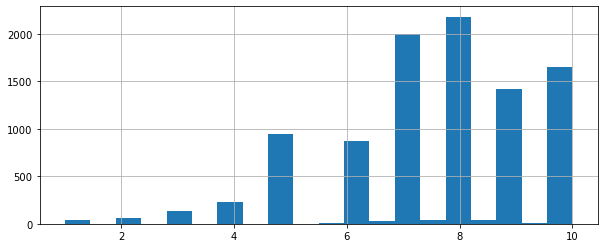

In [13]:
plt.figure(figsize=(10,4))
book_rate['Book.Rating'].hist(bins=20)

<AxesSubplot:>

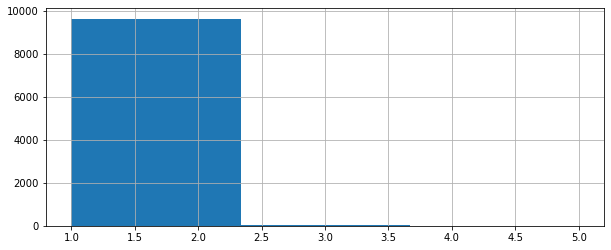

In [14]:
plt.figure(figsize=(10,4))
book_rate['Num of rating'].hist(bins=3)

In [15]:
book_df=book.pivot_table(index='User_ID',columns='Book.Title',values='Book.Rating')
book_df.head()

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,�?�?bermorgen.
User_ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
book_df.fillna(0, inplace=True)
book_df.head()

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,�?�?bermorgen.
User_ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [18]:
user_sim = 1 - pairwise_distances( book_df.values,metric='cosine')

In [19]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [20]:
user_sim_=pd.DataFrame(user_sim)

In [21]:
user_sim_.index=book.User_ID.unique()
user_sim_.columns=book.User_ID.unique()

In [22]:
user_sim_.iloc[0:6,0:6]

,276726,276729,276736,276737,276744,276745
276726,1.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
np.fill_diagonal(user_sim,0)
user_sim_.iloc[0:6,0:6]

,276726,276729,276736,276737,276744,276745
276726,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# lets check we have rate Classical Mythology then which book recommed next
Classical_Mythology=book_df['Classical Mythology']
Classical_Mythology.head()

User_ID
8     0.0
9     0.0
10    0.0
12    0.0
14    0.0
Name: Classical Mythology, dtype: float64

In [25]:
Classical_Mythology_coor=book_df.corrwith(Classical_Mythology)
Classical_Mythology_coor.head()

Book.Title
 Jason, Madison &amp                                                    -0.000459
 Other Stories;Merril;1985;McClelland &amp                              -0.000459
 Repairing PC Drives &amp                                               -0.000459
'48                                                                     -0.000459
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities   -0.000459
dtype: float64

In [26]:
CM_corr=pd.DataFrame(Classical_Mythology_coor,columns=['correlation'])
CM_corr.head()

,correlation
Book.Title,
"Jason, Madison &amp",-0.000459
Other Stories;Merril;1985;McClelland &amp,-0.000459
Repairing PC Drives &amp,-0.000459
'48,-0.000459
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000459


In [27]:
CM_corr.sort_values('correlation',ascending=False)

,correlation
Book.Title,
Classical Mythology,1.000000
No One Thinks of Greenland,-0.000459
Evening News: A Novel,-0.000459
Cakewalk,-0.000459
Oral History,-0.000459
...,...
Vanished,-0.000904
Charlie and the Chocolate Factory,-0.000904
"The Subtle Knife (His Dark Materials, Book 2)",-0.000911
